In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
import json

In [26]:
# Cargar el dataset
df = load_diabetes(as_frame=True)
data = df.frame

In [27]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


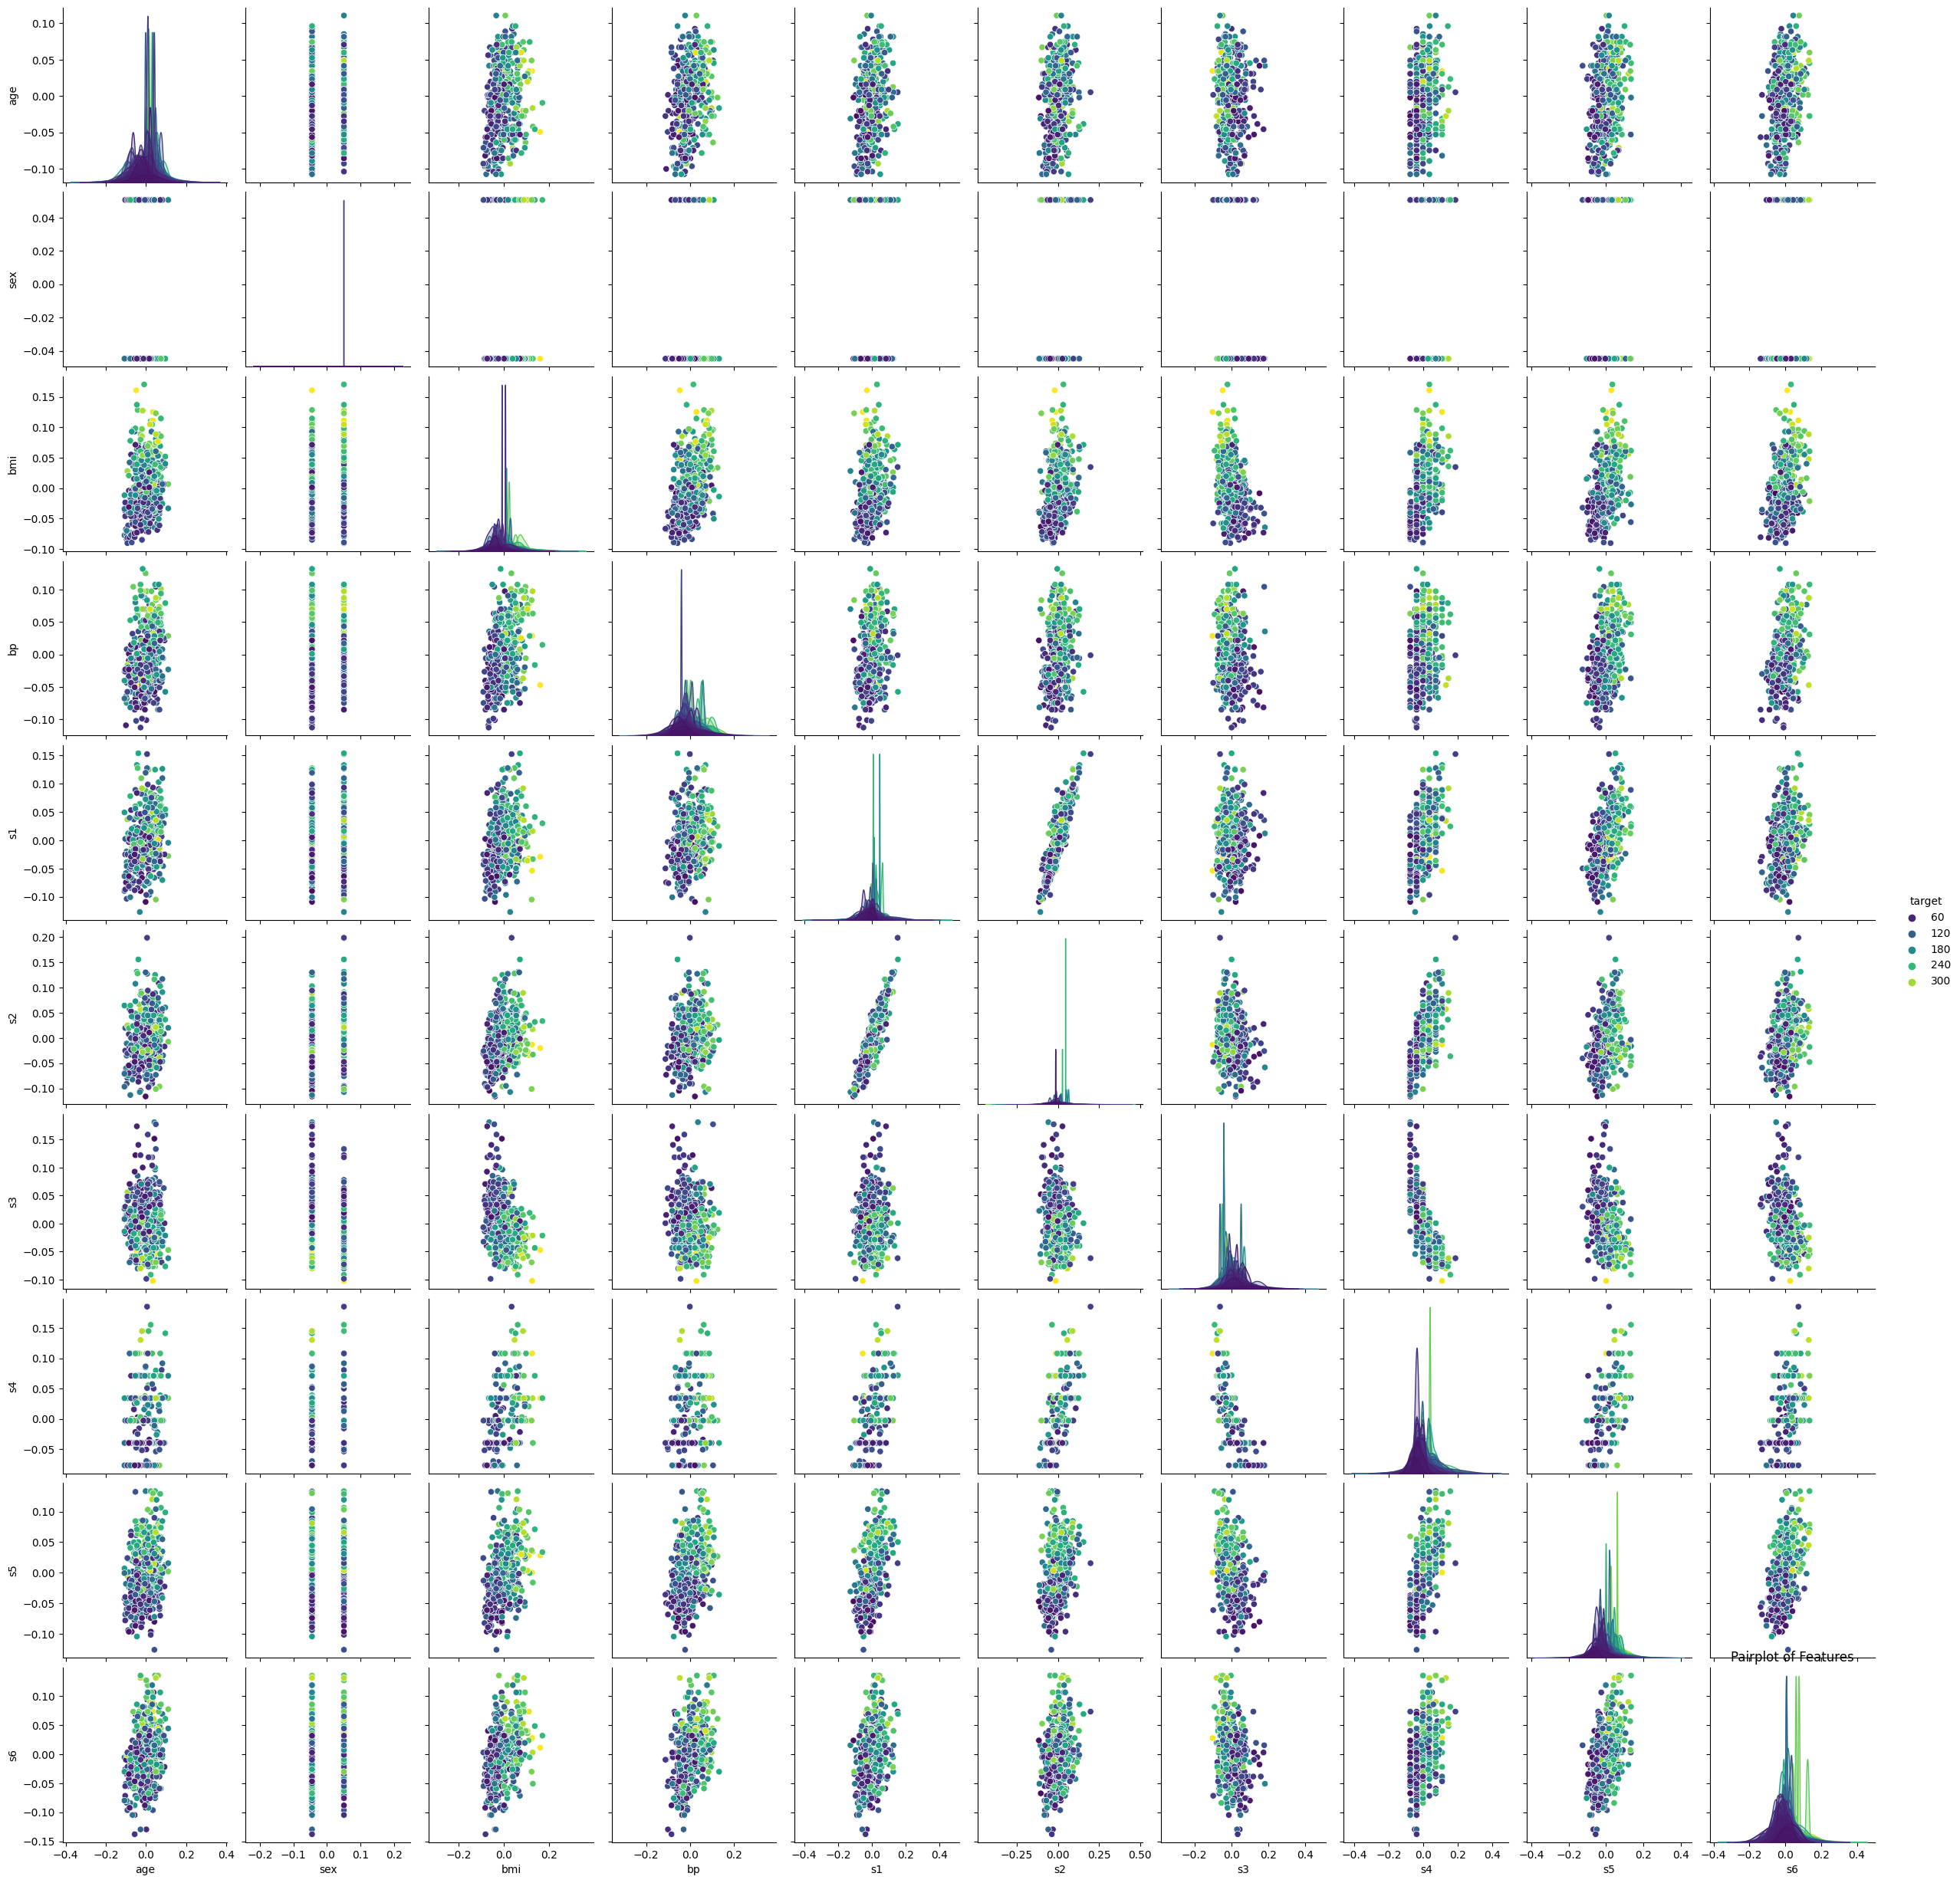

In [30]:
sns.pairplot(data, hue='target', palette='viridis')
plt.title("Pairplot of Features")
plt.show()

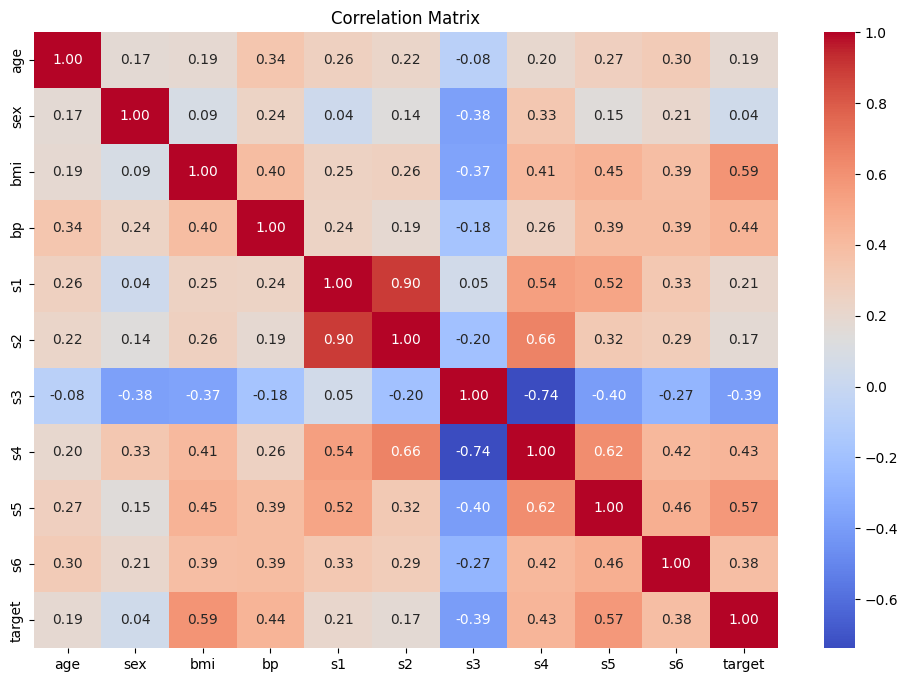

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [32]:
X = data.iloc[:, :-1].values  # Todas las características excepto la última (target)
y = data['target'].values

In [33]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

In [36]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__gamma': [10, 1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [2, 3, 4]
}

In [41]:
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=3, scoring="accuracy", cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.016 total time=   0.5s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.032 total time=   0.5s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.000 total time=   0.5s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.000 total time=   0.4s
[CV 5/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.016 total time=   0.4s
[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.032 total time=   0.4s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.032 total time=   0.4s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.016 total time=   0.4s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.000 total time=   0.4s
[CV 5/5] END svm__C=0.01, svm__degree=2,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__degree': [2, 3, 4],
                         'svm__gamma': [10, 1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

## Best parameter

In [42]:
print("Best Parameter",grid.best_params_)
best_model=grid.best_estimator_

Best Parameter {'svm__C': 0.01, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


# Cross Validation

In [43]:
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated Accuracy: 0.01 ± 0.00


# METRICS AND PREDICTIONS

In [44]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

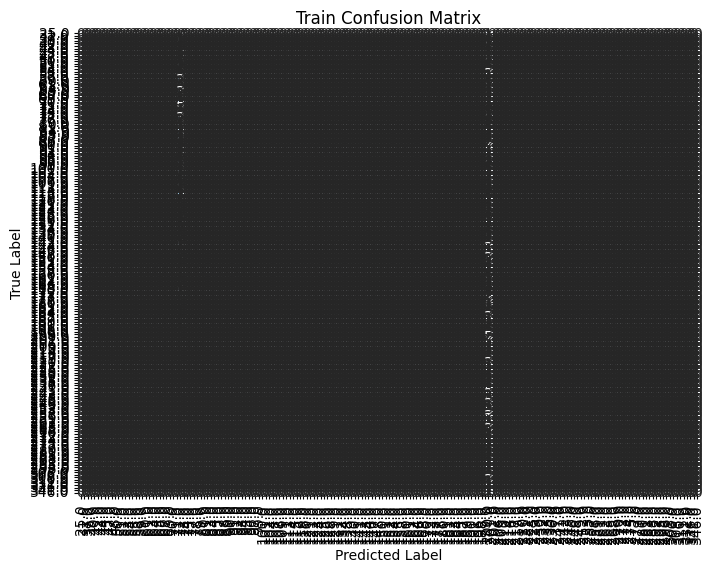

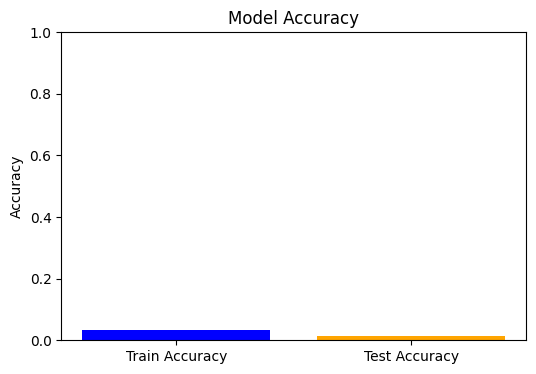

In [45]:
# Visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Llamar a la función para graficar la matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(y_train, y_train_pred, title='Train Confusion Matrix')

# Mostrar métricas de precisión
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Gráfico de precisión
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [47]:
print("Train - Classification report:\n", classification_report(y_train, y_train_pred))
print("Test - Classification report:\n", classification_report(y_test, y_test_pred))


Train - Classification report:
               precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         2
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

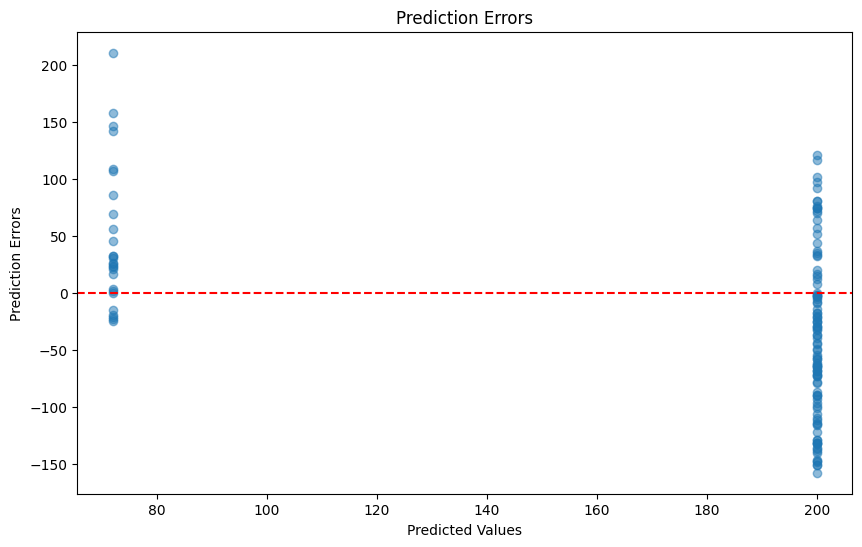

In [49]:
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Predicted Values')
plt.ylabel('Prediction Errors')
plt.show()

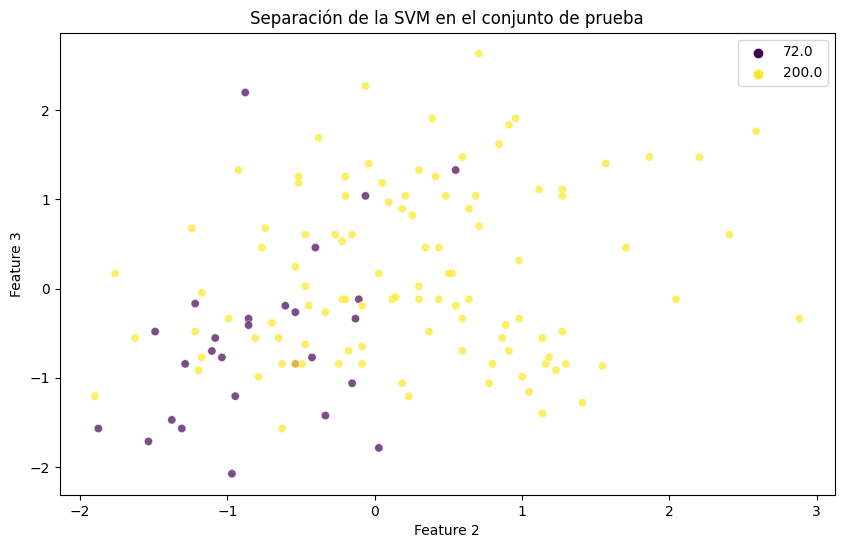

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_test_pred, palette='viridis', alpha=0.7)
plt.title('Separación de la SVM en el conjunto de prueba')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.show()